In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("Exam_Score_Prediction.csv")

In [ ]:
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows:")
print(data.head())

Dataset Shape: (20000, 13)

First 5 Rows:
   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.9 

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64


In [ ]:
data = data.drop_duplicates()

In [ ]:
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

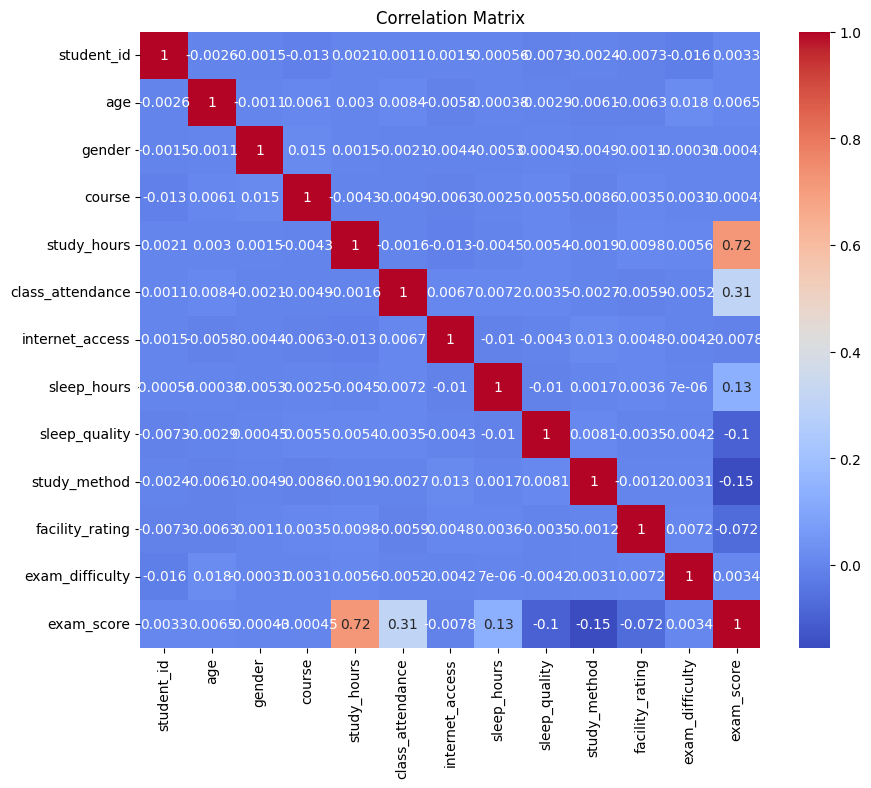

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

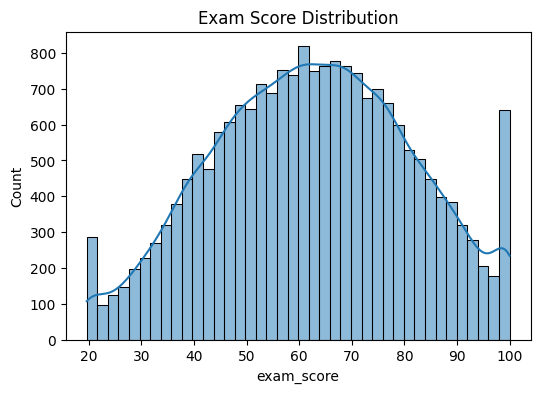

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data["exam_score"], kde=True)
plt.title("Exam Score Distribution")
plt.show()

In [ ]:
X = data.drop("exam_score", axis=1)
y = data["exam_score"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Performance:")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Performance:
MAE : 8.800926454747175
MSE : 118.9585650291178
RMSE: 10.906812780510988
R2 Score: 0.6674320469490582

Random Forest Performance:
MAE : 8.4465367275
MSE : 109.36456152504519
RMSE: 10.457751265212096
R2 Score: 0.6942536390398168


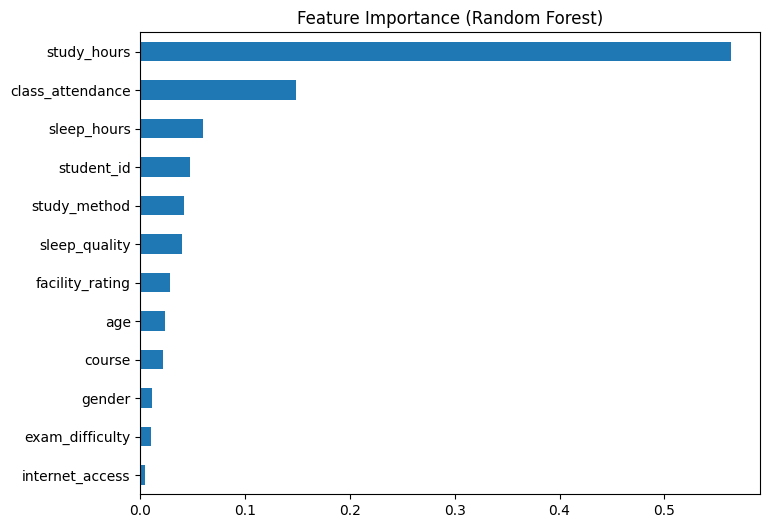

In [ ]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=True)
plt.figure(figsize=(8,6))
importance.plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()

In [ ]:
sample_student = X_test[0].reshape(1, -1)
predicted_score = rf.predict(sample_student)
print("\nSample Predicted Exam Score:", predicted_score[0])


Sample Predicted Exam Score: 34.491375000000005
